<a href="https://colab.research.google.com/github/mostafashahin/SSD_Detection/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set the Scene

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My\ Drive/test/SSD_Detection/

/content/gdrive/My Drive/test/SSD_Detection


In [0]:
!chmod 777 openSmile/bin/SMILExtract
!cp openSmile/bin/SMILExtract /usr/local/bin/

#Fetching the UltraSuite Data

In [0]:
!rsync -av ultrasuite-rsync.inf.ed.ac.uk::ultrasuite/labels-uxtd-uxssd-upx .

In [0]:
!rsync -av --include="*/" --include="*.wav" --exclude="*" ultrasuite-rsync.inf.ed.ac.uk::ultrasuite/core-uxtd .

In [0]:
!rsync -av --include="*/" --include="*.wav" --exclude="*" ultrasuite-rsync.inf.ed.ac.uk::ultrasuite/core-uxssd ../Datasets/UltraSuite/

In [0]:
!rsync -av --include="*/" --include="*.wav" --exclude="*" ultrasuite-rsync.inf.ed.ac.uk::ultrasuite/core-upx ../Datasets/UltraSuite/

# Extracting Features

In [0]:
import DataPreparation.Prepare_Ultra_Data as DP

***Extract the TD data features***

Select Data with Speaker list Train/Test 

In [0]:
with open('TD_Train_IDs.txt') as fTD_Train, open('TD_Test_IDs.txt') as fTD_Test:
  uxtd_Train_Speakers = fTD_Train.read().splitlines()
  uxtd_Test_Speakers = fTD_Test.read().splitlines()

In [0]:
uxtd_dWaves_Segments_Train, uxtd_dWaves_Segments_Test = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-uxtd', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/uxtd/speaker_labels/TG/', Sessions='', Tasks=['A','B','C','F'], Train_Spkrs_List=uxtd_Train_Speakers, Test_Spkrs_List=uxtd_Test_Speakers)

Write Segments to CSV files

In [0]:
DP.Write_Wave_Segments_To_File(uxtd_dWaves_Segments_Train,'uxtd_segments_Train.csv')
DP.Write_Wave_Segments_To_File(uxtd_dWaves_Segments_Test,'uxtd_segments_Test.csv')

Run openSmile

In [0]:
DP.Extract_Features_openSmile('uxtd_segments_Train.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='uxtd_Train_output_GeMAPs.csv')
DP.Extract_Features_openSmile('uxtd_segments_Test.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='uxtd_Test_output_GeMAPs.csv')

In [0]:
#uxtd_dWaves_Segments = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-uxtd', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/uxtd/speaker_labels/TG/', Sessions='', Tasks=['A','B','C','F'])

In [0]:
#DP.Write_Wave_Segments_To_File(uxtd_dWaves_Segments,'uxtd_segments.csv')

In [0]:
#DP.Extract_Features_openSmile('uxtd_segments.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='output_GeMAPs.csv')

***Extract the SSD data features***

In [0]:
with open('uxssd_Train_IDs.txt') as fSSD_Train, open('uxssd_Test_IDs.txt') as fSSD_Test:
  uxssd_Train_Speakers = fSSD_Train.read().splitlines()
  uxssd_Test_Speakers = fSSD_Test.read().splitlines()

In [0]:
uxssd_dWaves_Segments_Train, uxssd_dWaves_Segments_Test = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-uxssd', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/uxssd/speaker_labels/TG/', Sessions='BL1,BL2', Tasks=['A','B','C','F'],Train_Spkrs_List=uxssd_Train_Speakers,Test_Spkrs_List=uxssd_Test_Speakers)

In [0]:
DP.Write_Wave_Segments_To_File(uxssd_dWaves_Segments_Train,'uxssd_segments_Train.csv')
DP.Write_Wave_Segments_To_File(uxssd_dWaves_Segments_Test,'uxssd_segments_Test.csv')

In [0]:
DP.Extract_Features_openSmile('uxssd_segments_Train.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='uxssd_Train_output_GeMAPs.csv')
DP.Extract_Features_openSmile('uxssd_segments_Test.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='uxssd_Test_output_GeMAPs.csv')

In [0]:
#uxssd_dWaves_Segments = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-uxssd', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/uxssd/speaker_labels/TG/', Sessions='BL1,BL2', Tasks=['A','B','C','F'])

In [0]:
#DP.Write_Wave_Segments_To_File(uxssd_dWaves_Segments,'uxssd_segments.csv')

In [0]:
#DP.Extract_Features_openSmile('uxssd_segments.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='uxssd_output_GeMAPs.csv')

***Extraxt the upx SSD features***

In [0]:
with open('upx_Train_IDs.txt') as fSSD_Train, open('upx_Test_IDs.txt') as fSSD_Test:
  upx_Train_Speakers = fSSD_Train.read().splitlines()
  upx_Test_Speakers = fSSD_Test.read().splitlines()

In [0]:
upx_dWaves_Segments_Train, upx_dWaves_Segments_Test = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-upx', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/upx/speaker_labels/TG/', Sessions='BL1,BL2', Tasks=['A','B','C','F'],Train_Spkrs_List=upx_Train_Speakers, Test_Spkrs_List=upx_Test_Speakers)

In [0]:
DP.Write_Wave_Segments_To_File(upx_dWaves_Segments_Train,'upx_segments_Train.csv')
DP.Write_Wave_Segments_To_File(upx_dWaves_Segments_Test,'upx_segments_Test.csv')

In [0]:
DP.Extract_Features_openSmile('upx_segments_Train.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='upx_Train_output_GeMAPs.csv')
DP.Extract_Features_openSmile('upx_segments_Test.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='upx_Test_output_GeMAPs.csv')

In [0]:
#upx_dWaves_Segments = DP.Select_Data('/content/gdrive/My Drive/test/Datasets/UltraSuite/core-upx', '/content/gdrive/My Drive/test/Datasets/UltraSuite/labels-uxtd-uxssd-upx/upx/speaker_labels/TG/', Sessions='BL1,BL2', Tasks=['A','B','C','F'])

In [0]:
#DP.Write_Wave_Segments_To_File(upx_dWaves_Segments,'upx_segments.csv')

In [0]:
#DP.Extract_Features_openSmile('upx_segments.csv',sConfig_File='openSmile/config/gemaps/GeMAPSv01a.conf',sSegment_Level_csv_File='upx_output_GeMAPs.csv')

#The Magic Part

***Load features and split Train/Test***

In [0]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Load the Data

In [0]:
uxtd_train = pd.read_csv('uxtd_Train_output_GeMAPs.csv',sep=';')
uxtd_test = pd.read_csv('uxtd_Test_output_GeMAPs.csv',sep=';')
uxssd_train = pd.read_csv('uxssd_Train_output_GeMAPs.csv',sep=';')
uxssd_test = pd.read_csv('uxssd_Test_output_GeMAPs.csv',sep=';')
upx_train = pd.read_csv('upx_Train_output_GeMAPs.csv',sep=';')
upx_test = pd.read_csv('upx_Test_output_GeMAPs.csv',sep=';')

Convert to numpy

In [0]:
uxtd_train_data = uxtd_train.iloc[:,1:].values
uxtd_test_data = uxtd_test.iloc[:,1:].values
uxssd_train_data = uxssd_train.iloc[:,1:].values
uxssd_test_data = uxssd_test.iloc[:,1:].values
upx_train_data = upx_train.iloc[:,1:].values
upx_test_data = upx_test.iloc[:,1:].values

Normalize the Data

In [0]:
skScaler = MinMaxScaler()
skScaler.fit(np.r_[uxtd_train_data,uxssd_train_data,upx_train_data])
uxtd_train_data_norm = skScaler.transform(uxtd_train_data)
uxtd_test_data_norm = skScaler.transform(uxtd_test_data)
uxssd_train_data_norm = skScaler.transform(uxssd_train_data)
uxssd_test_data_norm = skScaler.transform(uxssd_test_data)
upx_train_data_norm = skScaler.transform(upx_train_data)
upx_test_data_norm = skScaler.transform(upx_test_data)

In [0]:
X_train_data = np.r_[uxtd_train_data_norm,uxssd_train_data_norm]
y_train = np.r_[np.zeros(uxtd_train_data_norm.shape[0]),np.ones(uxssd_train_data_norm.shape[0])]
X_test_data = np.r_[uxtd_test_data_norm,uxssd_test_data_norm]
y_test = np.r_[np.zeros(uxtd_test_data_norm.shape[0]),np.ones(uxssd_test_data_norm.shape[0])]

In [0]:
classifier = SVC(C=10,gamma=0.0001)

In [44]:
classifier.fit(X_train_data,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
classifier.score(X_test_data,y_test)

0.38670284938941657

In [0]:
uxtd_data = pandas.read_csv('output_GeMAPs.csv', sep=';')
uxssd_data = pandas.read_csv('uxssd_output_GeMAPs.csv',sep=';')
upx_data = pandas.read_csv('upx_output_GeMAPs.csv',sep=';')

In [0]:
uxtd_data.iloc[0:,1:] - uxtd_data.iloc[0:,1:].min()

In [0]:
uxtd_data_min_max = copy.deepcopy(uxtd_data)
uxtd_data_min_max.iloc[:,1:] = (uxtd_data_min_max.iloc[:,1:] - uxtd_data_min_max.iloc[:,1:].min())/(uxtd_data_min_max.iloc[:,1:].min() - uxtd_data_min_max.iloc[:,1:].max())

In [0]:
uxtd_data_stand = copy.deepcopy(uxtd_data)
uxtd_data_stand.iloc[:,1:] = (uxtd_data_stand.iloc[:,1:] - uxtd_data_stand.iloc[:,1:].mean())/uxtd_data_stand.iloc[:,1:].std()

In [0]:
uxtd_stats.iloc[[0:2],[0:2]]

SyntaxError: ignored

In [0]:
uxtd_data_stand.describe()

,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
count,0.0,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,...,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03,4.769000e+03
mean,NaN,2.886917e-15,-4.809647e-17,-6.716454e-15,3.256941e-15,2.266086e-15,1.010759e-16,5.552396e-16,-8.185480e-16,-4.807319e-16,...,-1.399524e-15,-2.153865e-15,9.514534e-17,1.103216e-15,8.440326e-15,8.725401e-16,2.628686e-15,-8.106793e-16,7.374020e-15,2.805816e-15
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,-2.319774e+00,-7.746002e-01,-2.267842e+00,-2.322969e+00,-2.293976e+00,-5.532553e-01,-1.900247e+00,-2.902739e-01,-1.185028e+01,...,-4.190513e+00,-3.969728e+00,-3.396029e+00,-6.780106e+00,-1.443486e+00,-1.149484e+00,-1.249588e+00,-5.814147e-01,-7.494917e-01,-4.950860e-01
25%,NaN,1.616643e-01,-6.389405e-01,1.872598e-01,1.945829e-01,1.588296e-01,-4.382556e-01,-3.647347e-01,-2.902739e-01,-2.483532e-01,...,-5.868400e-01,-6.189535e-01,-6.562471e-01,-5.595838e-01,-6.676779e-01,-6.720541e-01,-6.528534e-01,-5.814147e-01,-6.046451e-01,-4.950860e-01
50%,NaN,3.505623e-01,-4.614323e-01,3.858970e-01,3.558830e-01,3.093004e-01,-2.776896e-01,-3.266995e-01,-2.902739e-01,-1.842854e-01,...,-2.858185e-02,3.466335e-02,3.269123e-02,6.299844e-02,-1.426362e-01,-1.118052e-01,-1.646157e-01,-5.814147e-01,-4.018598e-01,-4.950860e-01
75%,NaN,4.864839e-01,4.052009e-01,5.045317e-01,4.692796e-01,4.355042e-01,-4.380065e-02,-1.055776e-01,-2.238619e-01,-4.888839e-02,...,5.698220e-01,6.238120e-01,7.076382e-01,5.847391e-01,4.229507e-01,4.394619e-01,4.863679e-01,4.022146e-01,1.002751e-01,-1.078684e-02
max,NaN,2.157118e+00,8.029575e+00,2.285248e+00,2.171974e+00,2.002955e+00,9.705012e+00,1.543197e+01,1.197598e+01,3.246125e+01,...,4.717152e+00,3.398283e+00,4.590857e+00,4.758880e+00,7.142122e+00,1.156208e+01,4.446518e+00,6.804513e+00,1.135969e+01,8.116218e+00


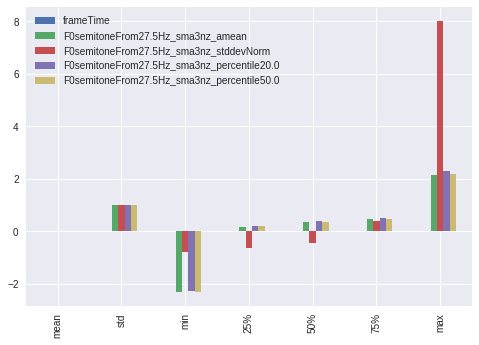

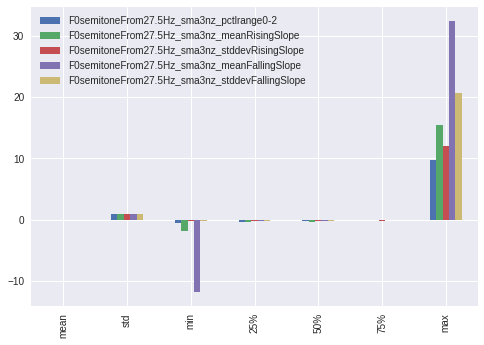

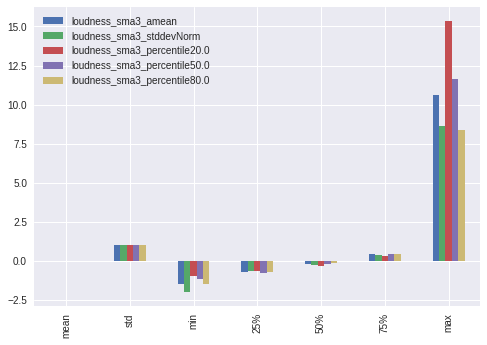

In [0]:
uxtd_stats = uxtd_data_stand.describe()
uxtd_stats.iloc[1:,:5].plot(kind='bar')
uxtd_stats.iloc[1:,6:11].plot(kind='bar')
uxtd_stats.iloc[1:,11:16].plot(kind='bar')

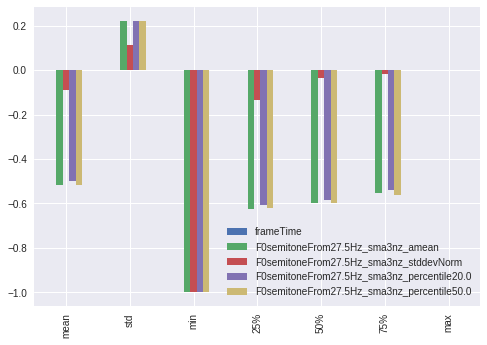

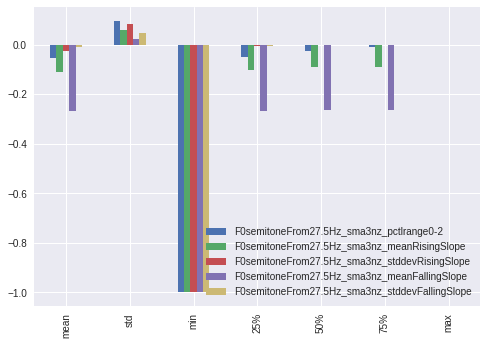

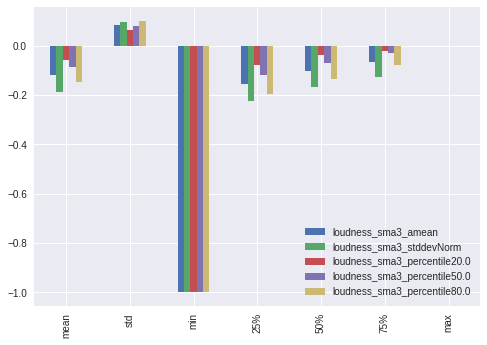

In [0]:
uxtd_stats = uxtd_data_min_max.describe()
uxtd_stats.iloc[1:,:5].plot(kind='bar')
uxtd_stats.iloc[1:,6:11].plot(kind='bar')
uxtd_stats.iloc[1:,11:16].plot(kind='bar')

In [0]:
uxtd_stats

,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
count,4769.0,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,...,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,0.0,31.911535,0.065178,30.654890,31.881125,33.159493,2.504603,96.681408,40.719669,26.826517,...,-2.626127,10.113135,0.000999,-0.003060,3.362571,2.260705,0.230345,0.040540,0.258719,0.083652
std,0.0,13.756312,0.084144,13.517209,13.724300,14.455032,4.527029,265.073226,140.280153,108.017620,...,5.725784,7.193329,0.030406,0.006858,2.329480,1.966713,0.184336,0.069727,0.345193,0.168964
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-407.023200,0.000000,-1253.212000,...,-26.620100,-18.442420,-0.102262,-0.049558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,34.135440,0.011415,33.186120,34.551640,35.455380,0.520607,0.000000,0.000000,0.000000,...,-5.986246,5.660799,-0.018955,-0.006897,1.807229,0.938967,0.110000,0.000000,0.050000,0.000000
50%,0.0,36.733980,0.026351,35.871140,36.765370,37.630440,1.247494,10.082110,0.000000,6.920448,...,-2.789780,10.362480,0.001993,-0.002628,3.030303,2.040816,0.200000,0.000000,0.120000,0.000000
75%,0.0,38.603760,0.099273,37.474750,38.321660,39.454720,2.306316,68.695600,9.316290,21.545710,...,0.636552,14.600420,0.022516,0.000950,4.347826,3.125000,0.320000,0.068586,0.293333,0.081829
max,0.0,61.585520,0.740819,61.545070,61.689950,62.112270,46.439470,4187.284000,1720.712000,3533.213000,...,24.383270,34.558100,0.140591,0.029577,20.000000,25.000000,1.050000,0.515000,4.180000,1.455000


In [0]:
uxssd_data.describe()

,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
count,4399.0,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,...,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000
mean,0.0,30.185528,0.052539,29.067634,30.428565,31.541356,2.473722,82.427909,30.876813,19.104303,...,-4.105202,11.485960,-0.001894,-0.003200,4.001278,2.202074,0.212943,0.031978,0.238422,0.060714
std,0.0,16.265933,0.075569,15.926840,16.390634,16.991906,3.934260,261.944996,128.675912,87.609722,...,5.726986,7.183638,0.033344,0.007252,2.503613,2.052111,0.386914,0.139495,0.387541,0.138276
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-519.770400,0.000000,-539.351700,...,-31.264790,-20.645710,-0.121205,-0.048582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,30.698265,0.006387,24.488520,31.264990,32.861100,0.297390,0.000000,0.000000,-0.071823,...,-7.988612,7.026904,-0.023484,-0.007363,2.296214,0.699301,0.040000,0.000000,0.050000,0.000000
50%,0.0,37.717070,0.026298,36.661330,37.991120,39.146820,1.579575,5.361214,0.000000,0.000000,...,-3.948856,11.184170,-0.003947,-0.003195,3.488372,1.960784,0.173333,0.000000,0.120000,0.000000
75%,0.0,40.026960,0.056007,39.087175,40.370910,41.656590,2.954743,35.252090,2.157353,15.954770,...,-0.270697,16.439590,0.019002,0.000427,5.263158,3.030303,0.310000,0.025000,0.270000,0.046963
max,0.0,61.977040,0.780659,61.810130,62.014470,62.175290,47.896870,3892.213000,1973.377000,2215.028000,...,23.352420,43.499760,0.139173,0.039392,20.000000,20.000000,15.300000,7.605000,13.230000,1.457636


In [0]:
upx_data.describe()

,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
count,8708.0,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,...,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.0,33.361840,0.093610,31.205283,33.663265,35.634610,4.429327,139.156051,50.163092,46.695856,...,-4.654624,11.846527,-0.003090,-0.005216,4.135666,3.009803,0.186179,0.041583,0.158292,0.049769
std,0.0,12.653080,0.116843,12.886070,12.856127,13.573960,6.926491,350.407990,163.850872,162.475290,...,5.018596,6.791427,0.025140,0.008296,2.425672,2.299429,0.151635,0.068759,0.189617,0.096097
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-471.214500,0.000000,-1475.253000,...,-33.068490,-25.306480,-0.140791,-0.058517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,34.055095,0.015987,31.744445,34.707065,36.485550,0.839511,0.000000,0.000000,0.000000,...,-7.798773,7.980558,-0.017696,-0.010510,2.564103,1.754386,0.080000,0.000000,0.050000,0.000000
50%,0.0,36.947860,0.041999,35.701635,37.323200,38.639650,2.081072,14.649965,0.000000,10.224110,...,-4.723698,12.085510,-0.002361,-0.005178,3.703704,2.666667,0.160000,0.000000,0.106667,0.000000
75%,0.0,39.366710,0.141893,38.084165,39.598520,41.359605,4.327528,118.163800,12.437288,37.108270,...,-1.668222,16.225677,0.010943,0.000000,5.172414,3.947368,0.260000,0.069397,0.200000,0.062147
max,0.0,61.082790,0.781173,61.077650,61.705750,61.932590,45.926350,4318.276000,2228.192000,4456.726000,...,24.919590,47.840190,0.139242,0.036525,22.222220,33.333340,2.550000,1.107754,5.410000,0.986056


In [0]:
upx_data[0:4000].describe()

,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
count,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.0,34.397124,0.079359,32.592999,34.593617,36.386055,3.793056,125.650324,47.734199,42.901831,...,-4.678027,11.816517,0.001396,-0.005355,4.067457,2.907889,0.193611,0.041506,0.171987,0.055158
std,0.0,12.705861,0.100805,12.742540,12.824097,13.496029,5.846400,332.975089,155.780916,160.951152,...,4.663740,6.342007,0.025576,0.008038,2.426202,2.301596,0.154737,0.073034,0.203289,0.107176
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-437.065700,0.000000,-1364.672000,...,-27.162690,-25.306480,-0.124437,-0.058517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,35.469865,0.015665,33.792330,35.918692,37.306653,0.821619,0.000000,0.000000,0.000000,...,-7.517648,8.140299,-0.013916,-0.010410,2.500000,1.680672,0.083333,0.000000,0.050000,0.000000
50%,0.0,37.811265,0.036545,36.742215,37.969655,39.489530,2.011175,13.180390,0.000000,9.295046,...,-4.575030,11.727205,0.000695,-0.005423,3.636364,2.564103,0.166667,0.000000,0.110000,0.000000
75%,0.0,40.199575,0.113099,38.615332,40.191962,42.027852,3.972466,97.717087,12.822875,32.172780,...,-1.865871,15.830295,0.015428,-0.000259,5.000000,3.750000,0.275000,0.064807,0.220000,0.065518
max,0.0,61.082790,0.767848,61.077650,61.081770,61.932590,45.137310,3169.478000,1721.503000,4456.726000,...,24.919590,37.180260,0.132697,0.036441,22.222220,33.333340,1.570000,1.107754,2.910000,0.986056


In [0]:
from importlib import reload

In [0]:
reload(DP)

<module 'DataPreparation.Prepare_Ultra_Data' from '/content/gdrive/My Drive/test/SSD_Detection/DataPreparation/Prepare_Ultra_Data.py'>

In [0]:
!SMILE

In [0]:
!SMILExtract -C openSmile/config/gemaps/GeMAPSv01a.conf -ccmdHelp

In [0]:
with open('TD_Train_IDs.txt') as fTD_Train, open('TD_Test_IDs.txt') as fTD_Test:
  uxtd_Train_Speakers = fTD_Train.read().splitlines()
  uxtd_Test_Speakers = fTD_Test.read().splitlines()